In [1]:
from Utils import DiaSourceTools as DSTools
from astropy.time import Time
import numpy as np
import pickle
from lsst.afw.coord import coord as afwCoord
import lsst.afw.geom as afwGeom
import astropy.coordinates as coord
import astropy.units as u
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"

butler = dafPersist.Butler(DATADIR+"calexp_t") 

In [3]:
snls_array = DSTools.load_SNLS_SN()

In [4]:
snls_05 = [table for table in snls_array if table["id"][0].startswith("05")]

In [5]:
skmap = pickle.load( open("/datadec/cppm/jpreyes/CFHT_Production/detect_prod/deepCoadd/skyMap.pickle","r"))

In [8]:
options = []
for sn in snls_05:
        c1 = coord.SkyCoord( (str(sn["ra"][0])+" "+str(sn["dec"][0])), unit=(u.radian))
        stack_coord = afwCoord.Fk5Coord(afwGeom.Point2D(c1.ra.degree, c1.dec.degree), afwGeom.degrees)
        
        sn = sn[sn["bandpass"]=="sdssr"]
        
        
        info = skmap.findTractPatchList([stack_coord])
        print "==="
        print info
        tract_info = info[0]
        patch_info = tract_info[1]
        patch = patch_info[0].getIndex()
        max_n = np.argmax(sn["flux"])
        t = Time(sn["mjd"][max_n], format="mjd")
        options.append((t.iso.split(" ")[0], str(patch[0])+","+str(patch[-1])))

===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(15, 15), innerBBox=(minimum=(15000, 15000), maximum=(15999, 15999)), outerBBox=(minimum=(14900, 14900), maximum=(16099, 16099))),))]
===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(22, 8), innerBBox=(minimum=(22000, 8000), maximum=(22999, 8999)), outerBBox=(minimum=(21900, 7900), maximum=(23099, 9099))), PatchInfo(index=(22, 9), innerBBox=(minimum=(22000, 9000), maximum=(22999, 9999)), outerBBox=(minimum=(21900, 8900), maximum=(23099, 10099)))))]
===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(7, 10), innerBBox=(minimum=(7000, 10000), maximum=(7999, 10999)), outerBBox=(minimum=(6900, 9900), maximum=(8099, 11099))), PatchInfo(index=(8, 10), innerBBox=(minimum=(8000, 10000), maximum=(8999, 10999)), outerBBox=(minimum=(7900, 9900), maximum=(9099, 11099)))))]
===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(16, 24

===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(6, 25), innerBBox=(minimum=(6000, 25000), maximum=(6999, 25999)), outerBBox=(minimum=(5900, 24900), maximum=(7099, 26099))), PatchInfo(index=(7, 25), innerBBox=(minimum=(7000, 25000), maximum=(7999, 25999)), outerBBox=(minimum=(6900, 24900), maximum=(8099, 26099)))))]
===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(16, 15), innerBBox=(minimum=(16000, 15000), maximum=(16999, 15999)), outerBBox=(minimum=(15900, 14900), maximum=(17099, 16099))),))]
===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(17, 8), innerBBox=(minimum=(17000, 8000), maximum=(17999, 8999)), outerBBox=(minimum=(16900, 7900), maximum=(18099, 9099))),))]
===
[(TractInfo(id=0, ctrCoord=(-0.49768, -0.34676, 0.79503)), (PatchInfo(index=(16, 9), innerBBox=(minimum=(16000, 9000), maximum=(16999, 9999)), outerBBox=(minimum=(15900, 8900), maximum=(17099, 10099))),))]
===
[(TractInfo(i

In [9]:
print options 


[('2005-01-20', '15,15'), ('2005-02-14', '22,8'), ('2005-02-18', '7,10'), ('2005-03-17', '16,24'), ('2005-03-11', '10,16'), ('2005-04-01', '5,13'), ('2005-03-17', '10,14'), ('2005-04-01', '5,16'), ('2005-04-01', '10,25'), ('2005-04-09', '23,6'), ('2005-04-13', '10,18'), ('2005-04-13', '15,20'), ('2005-05-04', '20,5'), ('2005-05-04', '9,19'), ('2005-04-13', '19,24'), ('2005-05-15', '6,19'), ('2005-05-05', '20,14'), ('2005-05-12', '22,13'), ('2005-05-05', '8,22'), ('2005-05-04', '14,18'), ('2005-05-28', '5,22'), ('2005-06-02', '13,7'), ('2005-06-06', '13,16'), ('2005-06-13', '7,24'), ('2005-06-06', '9,9'), ('2005-06-02', '20,24'), ('2005-06-06', '6,11'), ('2005-06-13', '6,25'), ('2005-07-02', '16,15'), ('2005-07-02', '17,8'), ('2005-07-27', '16,9'), ('2005-07-14', '6,6'), ('2005-07-27', '10,11')]


In [98]:
def get_total_sources(pair, key='psf'):
    p = pair[-1]
    date = pair[0]
    tot_sources = []
    tot_visits = []
    try:
        for i in range(0,30):
            butler = dafPersist.Butler(DATADIR+key+"_tests"+p+"/test"+str(i))
            cls=butler.get("dayDiff_class_diaSrc", dataId={"date":date, "filter":"r", "tract":0, "patch":p})
            tot_sources.append((len(cls), cls, p))
            with open(DATADIR+key+"_tests"+p+"/test"+str(i)+"/instruction.txt", "rb") as in_file:
                tot_visits.append(in_file.read())
    except Exception as e:
        print e
        pass
    return tot_sources

In [99]:
import multiprocessing

try:
        pool = multiprocessing.Pool(1000)
        res =  pool.map(get_total_sources, options)
finally:
        pool.close()


No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-06-13', 'filter': 'r', 'tract': 0, 'patch': '6,25'}, tag=set([]))
No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-04-01', 'filter': 'r', 'tract': 0, 'patch': '10,25'}, tag=set([]))
No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-05-04', 'filter': 'r', 'tract': 0, 'patch': '20,5'}, tag=set([]))


In [100]:
res_def = [r for r in res if len(r)==30]
patches_res = []
for r in res_def:
    patches_res.append(r[0][-1])


In [101]:
matches = []
for eval_array, sn in zip(res, snls_05):
    sn_pos = {"ra": np.mean(sn["ra"]), "dec":np.mean(sn["dec"][0])}
    
    if len(eval_array)==30:
    
        local_match = np.zeros(30)
   
        for i, result in enumerate(eval_array):
            cat = result[1]
            for source in cat:
                
                pos = {"ra":source["coord_ra"], "dec":source["coord_dec"]}
                if DSTools.source_distance(pos, sn_pos)<1:
                    local_match[i]=1
                    break
        matches.append(local_match)
    #else:
        #matches.append([])

    
    
        

In [102]:
tot = np.sum(matches, axis=0)

In [103]:
def anotate_plot(ax, X, Y):
    for x, y in zip(X, Y):
        ax.annotate(str(y), xy=(x,y))

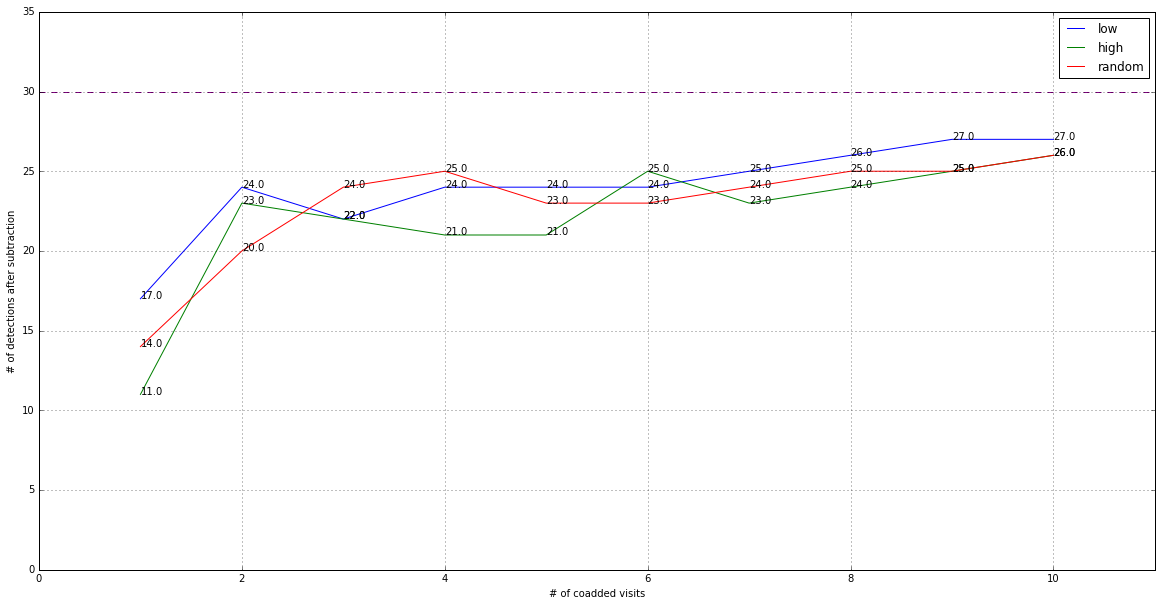

In [104]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(range(1,11),tot[:10],  label="low")
anotate_plot(ax, range(1,11),tot[:10] )
ax.plot(range(1,11),tot[10:20], label="high")
anotate_plot(ax, range(1,11),tot[10:20] )
ax.plot(range(1,11),tot[20:], label="random")
anotate_plot(ax, range(1,11),tot[20:] )

ax.set_xlabel("# of coadded visits")
ax.set_ylabel("# of detections after subtraction")
ax.set_xlim(xmin=0, xmax=11)
ax.set_ylim(ymin=0, ymax=35)
ax.grid()
ax.axhline(y=30, color="purple", linestyle='dashed')


ax.legend()

plt.show()


In [105]:
fixed_m = []
for m in matches:
    fixed_m.append(m[:10])
    fixed_m.append(m[10:20])
    fixed_m.append(m[20:])

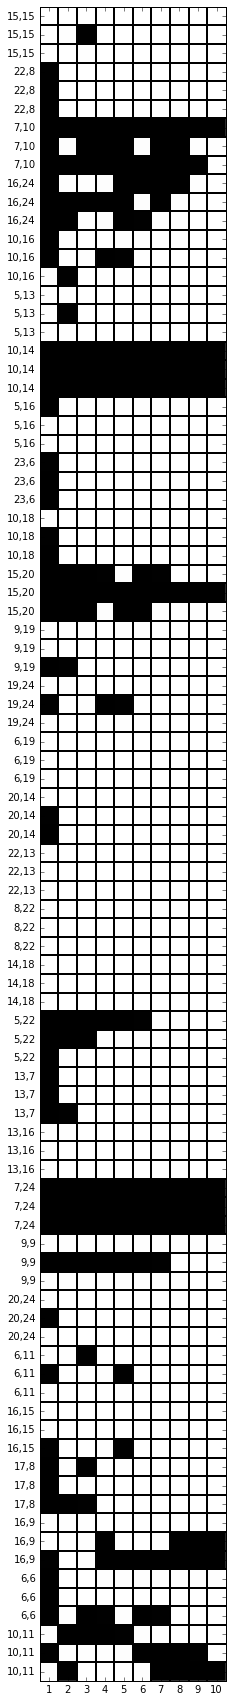

In [107]:
plt.figure(figsize=(15,30))
plt.imshow(fixed_m, interpolation="none", cmap="gray")
plt.grid(lw=2)
plt.xticks(range(1,31))

nrows = 30*3
ncols = 10

row_labels = [i%10+1 for i in range(0,32)]

plt.yticks(range(nrows),np.repeat(patches_res,3))
plt.xticks(range(ncols), row_labels)

ax=plt.gca()
ax.set_xticks([x-0.5 for x in range(1,ncols)],minor=True )
ax.set_yticks([y-0.5 for y in range(1,nrows)],minor=True)


ax.set_xlim(xmax=9.5)
ax.grid(False)

plt.grid(which="minor",ls="-",lw=2)

plt.show()

In [21]:
import multiprocessing

try:
        pool = multiprocessing.Pool(1000)
        res =  pool.map(get_total_sources, options)
finally:
        pool.close()

No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-06-13', 'filter': 'r', 'tract': 0, 'patch': '6,25'}, tag=set([]))
No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-05-04', 'filter': 'r', 'tract': 0, 'patch': '20,5'}, tag=set([]))
No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-04-01', 'filter': 'r', 'tract': 0, 'patch': '10,25'}, tag=set([]))
No locations for get: datasetType:dayDiff_class_diaSrc dataId:DataId(initialdata={'date': '2005-05-28', 'filter': 'r', 'tract': 0, 'patch': '5,22'}, tag=set([]))


In [22]:
matches = []
for eval_array, sn in zip(res, snls_05):
    sn_pos = {"ra": np.mean(sn["ra"]), "dec":np.mean(sn["dec"][0])}
    
    if len(eval_array)==30:
    
        local_match = np.zeros(30)
   
        for i, result in enumerate(eval_array):
            cat = result[1]
            for source in cat:
                
                pos = {"ra":source["coord_ra"], "dec":source["coord_dec"]}
                if DSTools.source_distance(pos, sn_pos)<1:
                    local_match[i]=1
                    break
        matches.append(local_match)
    #else:
        #matches.append([])


In [62]:
res_def = [r for r in res if len(r)==30]
patches_res = []
for r in res_def:
    patches_res.append(r[0][-1])


In [23]:
tot = np.sum(matches, axis=0)

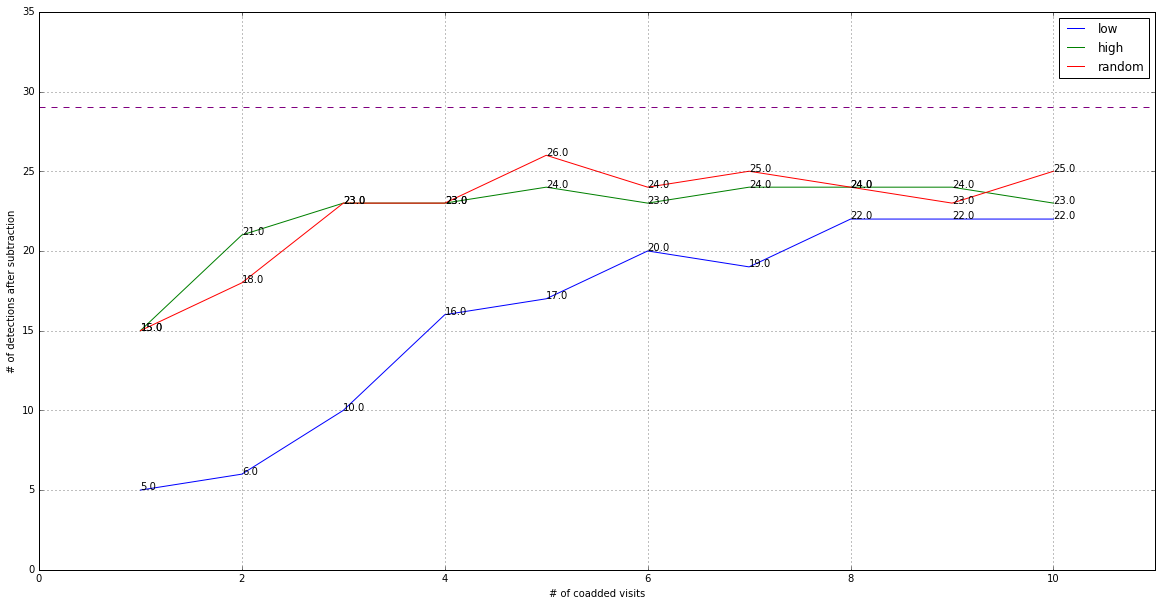

In [24]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(range(1,11),tot[:10],  label="low")
anotate_plot(ax, range(1,11),tot[:10] )
ax.plot(range(1,11),tot[10:20], label="high")
anotate_plot(ax, range(1,11),tot[10:20] )
ax.plot(range(1,11),tot[20:], label="random")
anotate_plot(ax, range(1,11),tot[20:] )

ax.set_xlabel("# of coadded visits")
ax.set_ylabel("# of detections after subtraction")
ax.set_xlim(xmin=0, xmax=11)
ax.set_ylim(ymin=0, ymax=35)
ax.grid()
ax.axhline(y=29, color="purple", linestyle='dashed')


ax.legend()

plt.show()


In [74]:
fixed_m = []
for m in matches:
    fixed_m.append(m[:10])
    fixed_m.append(m[10:20])
    fixed_m.append(m[20:])

In [95]:
test = np.repeat(patches_res,3)
test

array(['15,15', '15,15', '15,15', '22,8', '22,8', '22,8', '7,10', '7,10',
       '7,10', '16,24', '16,24', '16,24', '10,16', '10,16', '10,16',
       '5,13', '5,13', '5,13', '10,14', '10,14', '10,14', '5,16', '5,16',
       '5,16', '23,6', '23,6', '23,6', '10,18', '10,18', '10,18', '15,20',
       '15,20', '15,20', '9,19', '9,19', '9,19', '19,24', '19,24', '19,24',
       '6,19', '6,19', '6,19', '20,14', '20,14', '20,14', '22,13', '22,13',
       '22,13', '8,22', '8,22', '8,22', '14,18', '14,18', '14,18', '13,7',
       '13,7', '13,7', '13,16', '13,16', '13,16', '7,24', '7,24', '7,24',
       '9,9', '9,9', '9,9', '20,24', '20,24', '20,24', '6,11', '6,11',
       '6,11', '16,15', '16,15', '16,15', '17,8', '17,8', '17,8', '16,9',
       '16,9', '16,9', '6,6', '6,6', '6,6', '10,11', '10,11', '10,11'], 
      dtype='|S5')

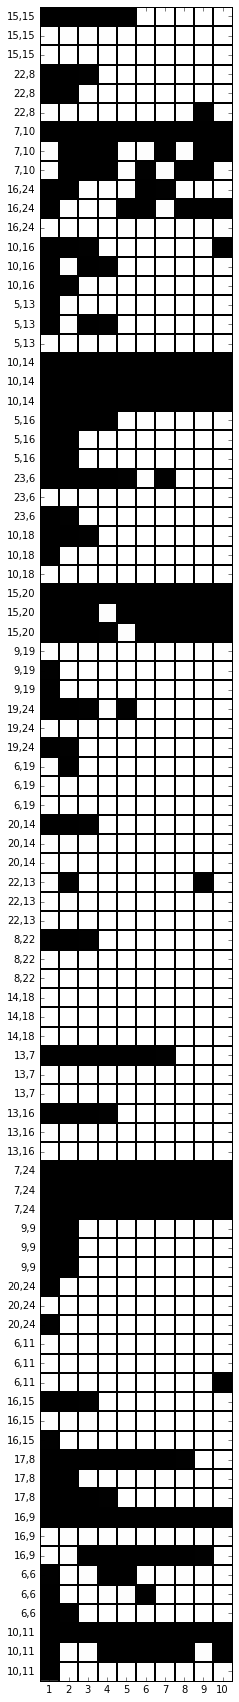

In [97]:
plt.figure(figsize=(15,30))
plt.imshow(fixed_m, interpolation="none", cmap="gray")
plt.grid(lw=2)
plt.xticks(range(1,31))

nrows = 29*3
ncols = 10

row_labels = [i%10+1 for i in range(0,32)]

plt.yticks(range(nrows),np.repeat(patches_res,3))
plt.xticks(range(ncols), row_labels)

ax=plt.gca()
ax.set_xticks([x-0.5 for x in range(1,ncols)],minor=True )
ax.set_yticks([y-0.5 for y in range(1,nrows)],minor=True)


ax.set_xlim(xmax=9.5)
ax.grid(False)

plt.grid(which="minor",ls="-",lw=2)

plt.show()

In [57]:
len(matches)

29